##신용부도스왑 (Credit Default Swap, CDS)
신용부도스왑은 채무 불이행(디폴트) 위험을 다른 당사자에게 전가하기 위한 계약입니다. CDS 매수자는 일정한 프리미엄을 지급하고, CDS 매도자는 채무 불이행 시 손실을 보상해줍니다.

In [2]:
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt

# Google Colab에 NanumGothic 폰트 설치
!apt-get update -qq
!apt-get install fonts-nanum* -qq

# 설치된 폰트 확인 및 matplotlib에 적용
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
font = fm.FontProperties(fname=font_path)
fm.fontManager.addfont(font_path)
plt.rc('font', family='NanumGothic')

Selecting previously unselected package fonts-nanum.
(Reading database ... 121925 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Selecting previously unselected package fonts-nanum-coding.
Preparing to unpack .../fonts-nanum-coding_2.5-3_all.deb ...
Unpacking fonts-nanum-coding (2.5-3) ...
Selecting previously unselected package fonts-nanum-eco.
Preparing to unpack .../fonts-nanum-eco_1.000-7_all.deb ...
Unpacking fonts-nanum-eco (1.000-7) ...
Selecting previously unselected package fonts-nanum-extra.
Preparing to unpack .../fonts-nanum-extra_20200506-1_all.deb ...
Unpacking fonts-nanum-extra (20200506-1) ...
Setting up fonts-nanum-extra (20200506-1) ...
Setting up fonts-nanum (20200506-1) ...
Setting up fonts-nanum-coding (2.5-3) ...
Setting up fonts-nanum-eco (1.000-7) ...
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...


디폴트 발생 없음
총 프리미엄 지불: 100000.00 USD
총 손실 보상: 0.00 USD
총 지불 금액: 100000.00 USD


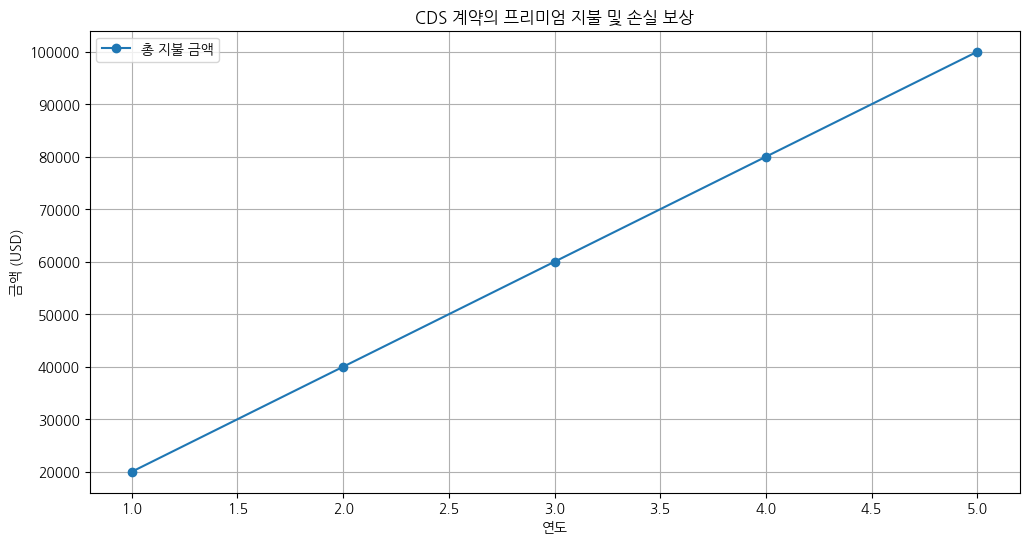

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# CDS 계약 파라미터
notional = 1000000  # 명목 금액
premium_rate = 0.02  # 연간 프리미엄 비율 (2%)
default_probability = 0.05  # 연간 디폴트 확률 (5%)
recovery_rate = 0.4  # 회수율 (40%)
maturity = 5  # CDS 만기 (5년)

# CDS 매수자의 프리미엄 지불 계산
premium_payment = notional * premium_rate
total_premium_payments = premium_payment * maturity

# 디폴트 발생 여부 시뮬레이션
np.random.seed(42)
default_occurs = np.random.rand(maturity) < default_probability


# 손실 및 보상 계산
if np.any(default_occurs):
    default_year = np.argmax(default_occurs) + 1
    loss = notional * (1 - recovery_rate)
    total_payments = total_premium_payments + loss
    print(f"디폴트 발생 연도: {default_year}년")
else:
    total_payments = total_premium_payments
    print("디폴트 발생 없음")

print(f"총 프리미엄 지불: {total_premium_payments:.2f} USD")
print(f"총 손실 보상: {loss if np.any(default_occurs) else 0:.2f} USD")
print(f"총 지불 금액: {total_payments:.2f} USD")

# 시각화
years = np.arange(1, maturity + 1)
premium_payments = np.full(maturity, premium_payment)
total_payments = np.cumsum(premium_payments)

# Initialize default_year to None for cases where no default occurs
default_year = None

if np.any(default_occurs):
    default_year = np.argmax(default_occurs) + 1
    total_payments[default_year - 1:] += loss

plt.figure(figsize=(12, 6))

plt.plot(years, total_payments, label='총 지불 금액', marker='o')

# Check if default_year is defined before plotting the vertical line
if default_year is not None:
    plt.axvline(x=default_year, color='r', linestyle='--', label='디폴트 발생')

plt.xlabel('연도')
plt.ylabel('금액 (USD)')
plt.title('CDS 계약의 프리미엄 지불 및 손실 보상')
plt.legend()
plt.grid(True)
plt.show()
